In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import re

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,8)
sns.set()

# Objetivo

Testar técnicas de webscraping e processamento de texto aplicadas à análise textual das atas do Copom.

## Base e URLs:

In [ ]:
# Pega todos os links de atas do API Bacen
url_base = 'https://www.bcb.gov.br/api/servico/sitebcb/atascopom/ultimas?quantidade=1000&filtro='
request = requests.get(url_base)
r_text = request.text

soup = BeautifulSoup(r_text)

In [ ]:
info = soup.text
info = info.replace('"','')

In [ ]:
# Extraindo informações principais acerca da Ata

# data_ref = re.search(r'"DataReferencia"+:".*',test).group()
data_ref = str(re.search(r'DataReferencia+:.*',info).group()).split(':')[1]

# titulo = re.search(r'"Titulo"+:".*',test).group()
titulo = str(re.search(r'Titulo+:.*',info).group()).split(':')[1]

# url = re.search(r'"Url"+:".*',test).group()
url = str(re.search(r'Url+:.*',info).group()).split(':')[1]

# link_pag = re.search(r'"LinkPagina"+:".*',test).group()
link_pag = str(re.search(r'LinkPagina+:.*',info).group()).split(':')[1]

print(f'''Ata Copom: {titulo}\nData de Referência: {data_ref}\nURL: {url}\nLink:{link_pag}''')

Ata Copom: 237ª Reunião - 16-17 março, 2021,Url
Data de Referência: 2021-03-17T03
URL: /content/copom/atascopom/Copom237-not20210317237.pdf,LinkPagina
Link:/publicacoes/atascopom/17032021,EsconderDataReferencia


In [ ]:
# Titulo:237ª Reunião
titles = re.findall(r'[Titulo]+:+[0-9ª]+\s[Reunião]+',info)

In [ ]:
# "Url":"/content/copom/atascopom/Copom234-not20201028234.pdf"
urls = re.findall(r'Url+:+\/[a-z]+\/[a-z]+\/[a-z]+\/+[A-Za-z0-9]+-+[A-Za-z0-9]+[\.pdf]+',info)

In [ ]:
# "LinkPagina":"/publicacoes/atascopom/05082020"
links = re.findall(r'LinkPagina:+\/+[a-z]+\/[a-z]+\/[0-9]+',info)

In [ ]:
# DataReferencia:2021-03-17T03:00:00Z
dates = re.findall(r'DataReferencia+:[0-9.*]+-+[0-9.*]+-+[0-9A-Z]+',info)

In [ ]:
# Titulo:237ª Reunião
titles = re.findall(r'[Titulo]+:+[0-9ª]+\s[Reunião]+',info)

# Url:/content/copom/atascopom/Copom234-not20201028234.pdf"
urls = re.findall(r'Url+:+\/[a-z]+\/[a-z]+\/[a-z]+\/+[A-Za-z0-9]+-+[A-Za-z0-9]+[\.pdf]+',info)

# LinkPagina:/publicacoes/atascopom/05082020"
links = re.findall(r'LinkPagina:+\/+[a-z]+\/[a-z]+\/[0-9]+',info)

# DataReferencia:2021-03-17T03:00:00Z
dates = re.findall(r'DataReferencia+:[0-9.*]+-+[0-9.*]+-+[0-9A-Z]+',info)

In [ ]:
# Número Total de Atas Encontradas

print('Atas: ' +str(len(titles)))
print('Datas: ' +str(len(dates)))
print('URLs: ' +str(len(urls)))
print('Links: ' +str(len(links)))

Atas: 217
Datas: 217
URLs: 38
Links: 217


In [ ]:
# Armazenando os dados

title_list = [title for title in titles]
dates_list = [date for date in dates]
url_list = [url for url in urls]
link_list = [link for link in links]

## Extraindo texto das URLs:

In [ ]:
import urllib,json

In [ ]:
#url_base = f'https://www.bcb.gov.br/api/servico/sitebcb/atascopom-conteudo/principal?filtro=IdentificadorUrl%20eq%20%27{codigo}%27'
# 08062016 199ª Reunião - junho 2016 - Última ata sem ser em PDF
links_antigos = link_list[38:]

In [ ]:
# Separando o ID da Ata

codigos_atas = []
for link in links_antigos:
  codigos_atas.append(link.split('/')[3])

In [ ]:
codigos_atas

In [ ]:
url_ata = 'https://www.bcb.gov.br/api/servico/sitebcb/atascopom-conteudo/principal?filtro=IdentificadorUrl%20eq%20%2707032012%27'
request = requests.get(url_ata)
r_text = request.text

soup = BeautifulSoup(r_text)

In [ ]:
# Obtendo e limpando o conteúdo de discussão da Ata

texto_ata = request.json()['conteudo'][0]['OutrasInformacoes']
texto_ata = re.sub(r'<(?:.|\n)*?>','',texto_ata) # Eliminar elementos de tags HTML | /<(?:.|\n)*?>/gm
texto_ata = texto_ata.replace('&nbsp;','') # Eliminar tags Non-breaking-Space
texto_ata = texto_ata.strip()

In [ ]:
print(texto_ata)

In [ ]:
## Agrupando os textos
textos_atas = []

for ata in codigos_atas:
  url_ata = f'https://www.bcb.gov.br/api/servico/sitebcb/atascopom-conteudo/principal?filtro=IdentificadorUrl%20eq%20%27{ata}%27'
  request = requests.get(url_ata)
  texto_ata = request.json()['conteudo'][0]['OutrasInformacoes']
  texto_ata = re.sub(r'<(?:.|\n)*?>','',texto_ata) # Eliminar elementos de tags HTML | /<(?:.|\n)*?>/gm
  texto_ata = texto_ata.replace('&nbsp;','') # Eliminar tags Non-breaking-Space
  texto_ata = re.sub(r'[^a-úA-Ú0-9\s]','',texto_ata) # Removendo caracteres não alfanuméricos
  texto_ata = texto_ata.strip()
  textos_atas.append(texto_ata)

In [ ]:
len(textos_atas)

179

In [ ]:
for word in str(textos_atas[1]).split():
  print(word)

In [ ]:
print(textos_atas[1])

## Limpando os textos das atas:

In [ ]:
for ata in textos_atas[:2]:
  for word in ata.split():
    print(word)

In [ ]:
for ata in textos_atas[:1]:
  for word in ata.split():
    print(word.lower())

In [ ]:
atas_completas = ' '.join( [word.lower() for word in ata.split() for ata in textos_atas] )

In [ ]:
atas_completas

In [ ]:
len(atas_completas)

## Análise Textual:

In [ ]:
import spacy
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
stopwords.words('portuguese')
stop_words = set(stopwords.words('portuguese'))

In [ ]:
word_tokens = word_tokenize(atas_completas)

In [ ]:
# Eliminando referências a meses

meses = ['janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']

In [ ]:
# Filtrando stop_words
filtered_sentence = [w for w in word_tokens if not w in stop_words] 

In [ ]:
filtered_words = ' '.join( [text for text in filtered_sentence] )

In [ ]:
for mes in meses:
  filtered_words = filtered_words.replace(mes,'')
filtered_words = filtered_words.replace('comitê','')
filtered_words = filtered_words.replace('copom','')

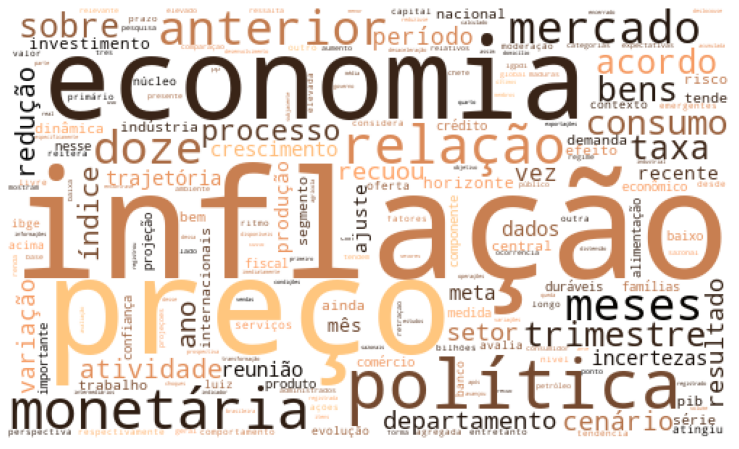

In [ ]:
word_cloud = WordCloud(width = 500, height = 300, 
                       random_state = 21,
                       collocations = False, 
                       background_color = 'white', colormap='copper',
                       max_font_size = 119).generate(filtered_words)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
df_z = pd.DataFrame(filtered_sentence)
df_z = df_z[0].value_counts()

In [ ]:
for mes in meses:
  try: 
    df_z.drop(mes,inplace=True)
  except KeyError:
    continue
df_z.drop('copom',inplace=True)
df_z.drop('2015',inplace=True)
df_z.drop('2016',inplace=True)

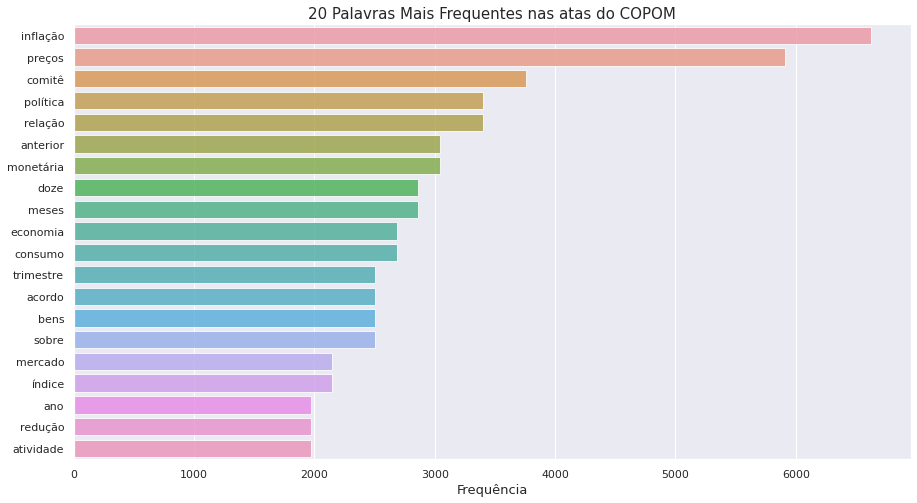

In [ ]:
sns.barplot(x = df_z[:20].values, y = df_z[:20].index,alpha=0.8)
plt.title('20 Palavras Mais Frequentes nas atas do COPOM',fontsize=15)
plt.xlabel('Frequência',fontsize = 13)
plt.show()